In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np

In [2]:
group1Participants = [10,11,12,13] 
startAnnotation = datetime.datetime(2023,3,30,0,0,0,0,tzinfo=pytz.timezone('UTC'))
startCoordination = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))

bookings = pd.read_json("bookingsFINAL.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True)
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True)
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True)

bookings = bookings.loc[bookings['user'].isin(group1Participants)] 
bookings = bookings.loc[bookings['start']>= startCoordination ] 

bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29.118000+00:00,2023-04-21 05:15:44+00:00
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57.780000+00:00,2023-04-21 08:45:57.781000+00:00
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31.875000+00:00,2023-04-21 08:47:31.875000+00:00
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09.962000+00:00,2023-04-21 12:06:09.962000+00:00
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01.702000+00:00,2023-04-21 14:54:01.702000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
132,2023-05-11 12:30:00+00:00,1800,toaster (Afternoon snack before working at lap...,I want the oven for 30 minutes but that isn't...,somewhat,0.23,8,electricity_consumption,10,2023-05-11 09:53:50.843000+00:00,2023-05-11 09:53:50.843000+00:00
136,2023-05-11 19:00:00+00:00,3600,oven (Baking),,somewhat,0.70,8,electricity_consumption,10,2023-05-11 11:52:50.986000+00:00,2023-05-11 11:52:50.986000+00:00
137,2023-05-12 09:00:00+00:00,7200,dishwasher (30min),,no,0.44,10,electricity_consumption,11,2023-05-12 07:44:33.072000+00:00,2023-05-12 07:44:33.072000+00:00
138,2023-05-12 10:00:00+00:00,3600,washing_and_drying (30min),,no,0.29,10,electricity_consumption,11,2023-05-12 07:45:19.141000+00:00,2023-05-12 06:45:09+00:00


In [3]:
pp = bookings.groupby(['user'])
ff = pp.agg({'measurement':'count'})
(ff)

,measurement
user,
10,28
11,32
12,15
13,8


array([[<Axes: title={'center': '10'}, xlabel='start'>],
       [<Axes: title={'center': '11'}, xlabel='start'>],
       [<Axes: title={'center': '12'}, xlabel='start'>],
       [<Axes: title={'center': '13'}, xlabel='start'>],
       [<Axes: xlabel='start'>],
       [<Axes: xlabel='start'>],
       [<Axes: xlabel='start'>],
       [<Axes: xlabel='start'>],
       [<Axes: xlabel='start'>],
       [<Axes: xlabel='start'>]], dtype=object)

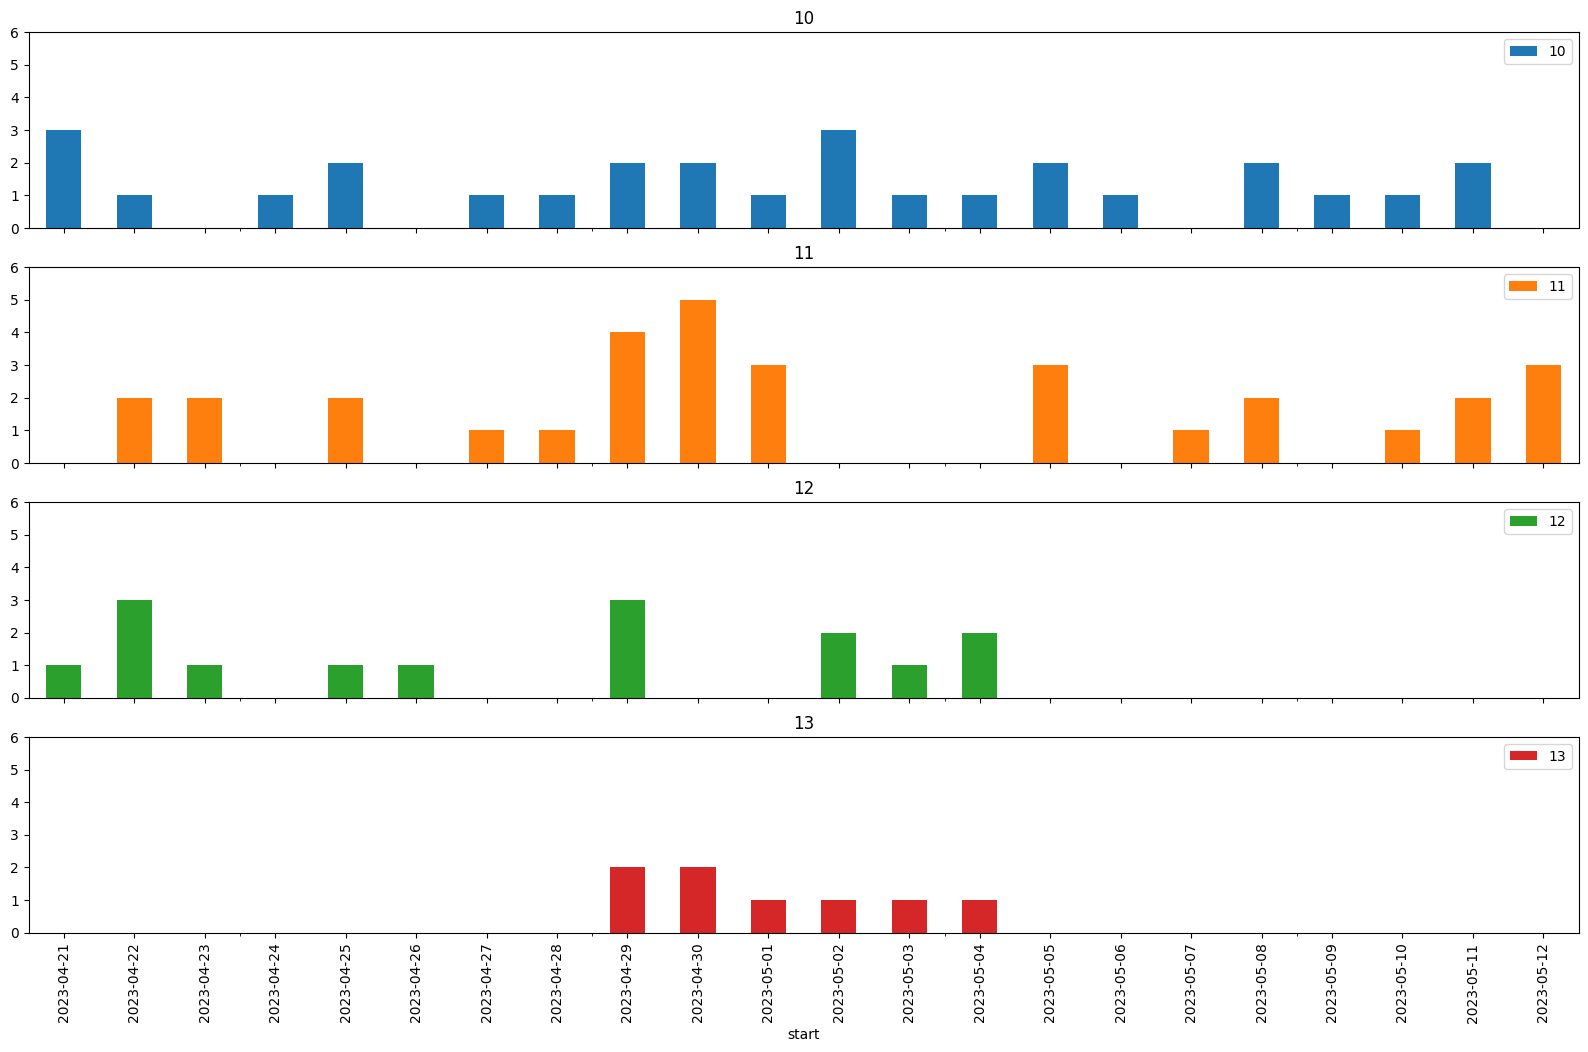

In [4]:
pp = bookings.groupby(['user',bookings.start.dt.date])
ff = pp.agg({'measurement':'count'})
pd.pivot_table(ff.reset_index(),
               index='start', columns='user', values='measurement'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30),ylim=[0, 6])

<Axes: xlabel='consumption'>

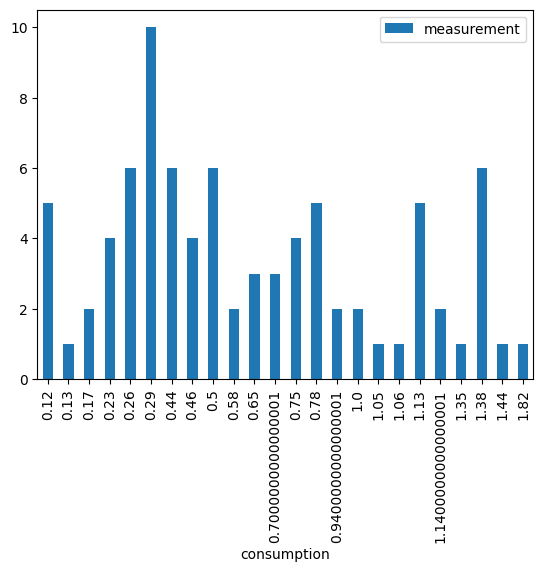

In [5]:
pp = bookings.groupby(['consumption'])
ff = pp.agg({'measurement':'count'})
(ff)
ff.plot.bar()

array([[<Axes: title={'center': '10'}, xlabel='consumption'>],
       [<Axes: title={'center': '11'}, xlabel='consumption'>],
       [<Axes: title={'center': '12'}, xlabel='consumption'>],
       [<Axes: title={'center': '13'}, xlabel='consumption'>],
       [<Axes: xlabel='consumption'>],
       [<Axes: xlabel='consumption'>],
       [<Axes: xlabel='consumption'>],
       [<Axes: xlabel='consumption'>],
       [<Axes: xlabel='consumption'>],
       [<Axes: xlabel='consumption'>]], dtype=object)

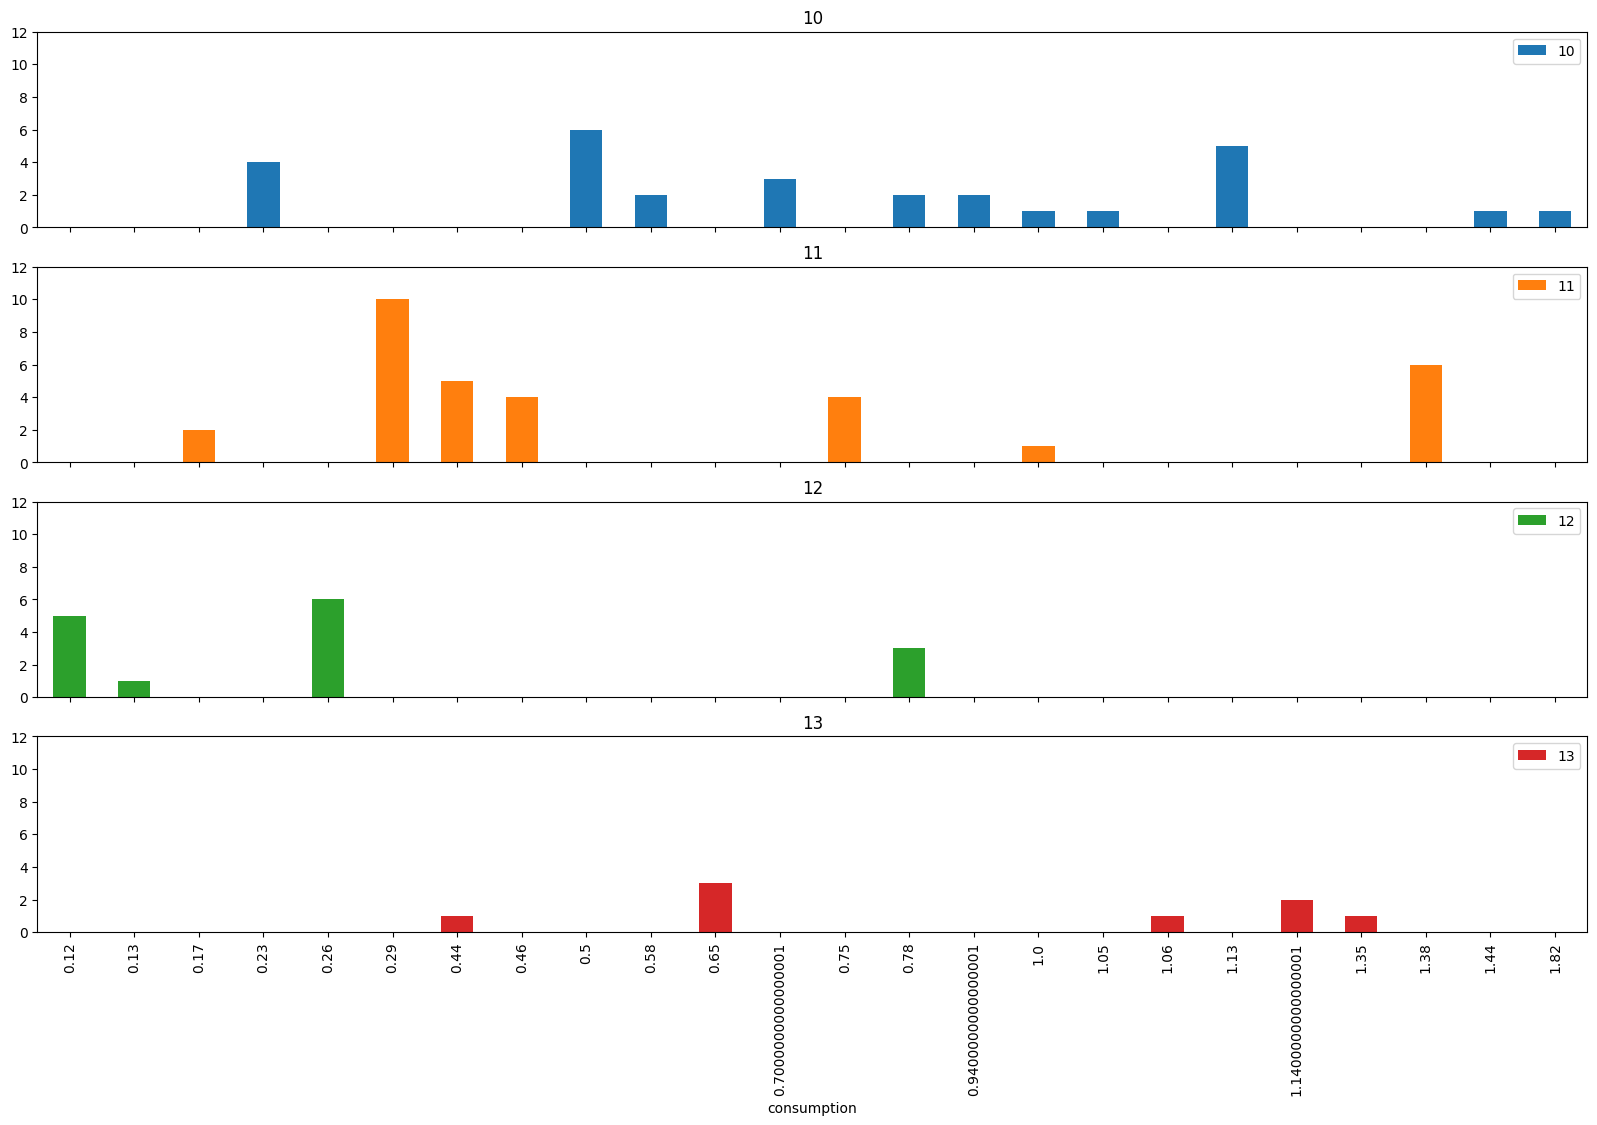

In [6]:
pp = bookings.groupby(['consumption','user'])
ff = pp.agg({'measurement':'count'})
(ff)
pd.pivot_table(ff.reset_index(),
               index='consumption', columns='user', values='measurement'
              ).plot.bar(subplots=True, layout=(10,1),figsize=(20, 30),ylim=[0, 12])

In [7]:
# How many bookings were edited?
editedbookings = bookings[bookings['modified_at'] != bookings['created_at']]

percentageEdited = 100 * editedbookings.shape[0] / bookings.shape[0] 
percentageEdited

25.301204819277107

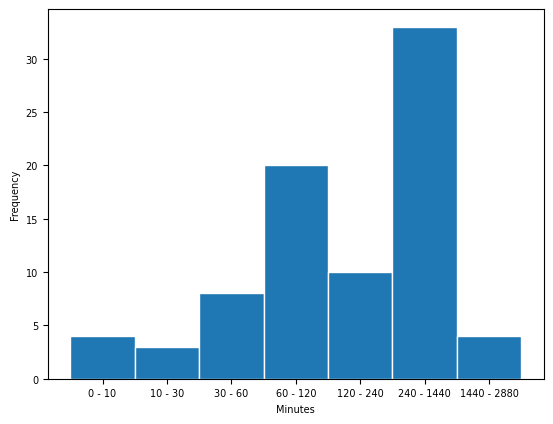

In [36]:
# How far in advance was a booking made?

bookings['diff'] = (bookings['start'] - bookings['created_at']) /pd.Timedelta(minutes=1)
# pd.Timedelta(t2 - t1).seconds / 60.0

plt.rcParams.update({'font.size': 7})

# bins=[0,60*24,60*48]
bins=[0,10,30,60,120,240,60*24,60*48]
hist, bin_edges = np.histogram(bookings['diff'],bins) # make the histogram

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,edgecolor = "White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)])

ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency")

plt.show()


array([[<Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>]],
      dtype=object)

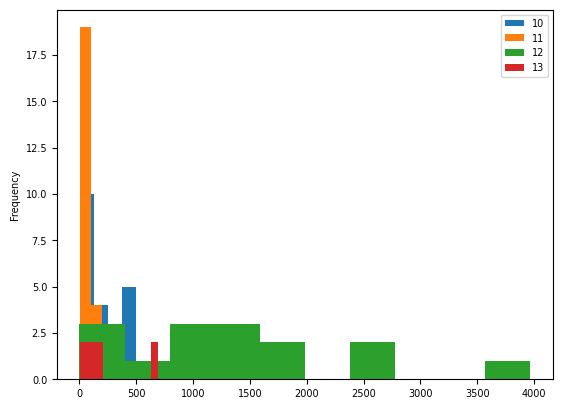

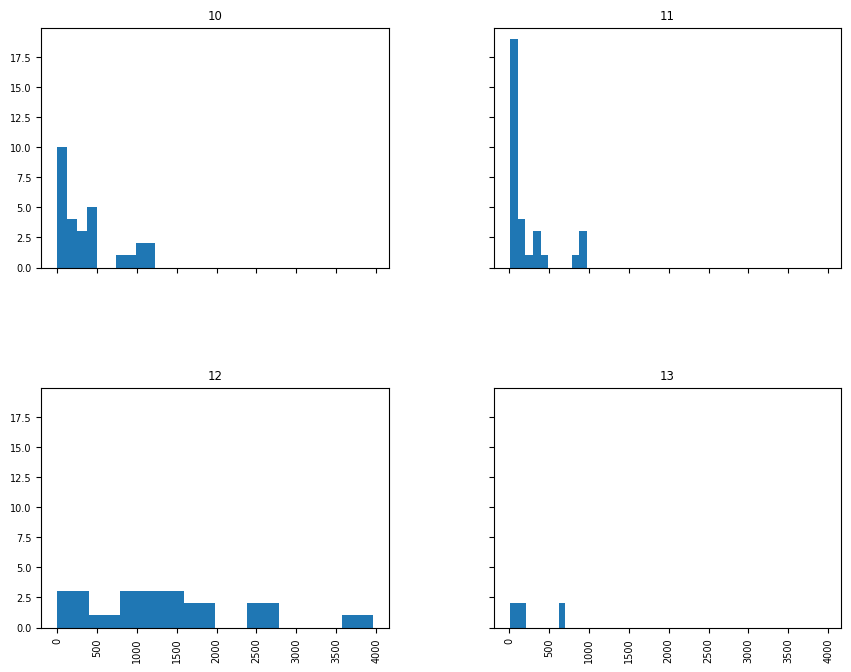

In [35]:
pp = bookings.groupby('user')['diff']
# ff = pp.agg({'measurement':'count'})
pp.plot.hist(legend=True)


bookings['diff'].hist(by=bookings['user'],sharey=True, sharex=True,figsize=(10, 8))
